# Fundamentals of Data Science
Winter Semester 2021

## Prof. Fabio Galasso, Guido D'Amely, Alessandro Flaborea, Luca Franco, Muhammad Rameez Ur Rahman and Alessio Sampieri
<galasso@di.uniroma1.it>, <damely@di.uniroma1.it>, <flaborea.1841969@studenti.uniroma1.it>, <franco.luca.17@gmail.com>, <rahman@di.uniroma1.it>, <alessiosampieri27@gmail.com>

## Exercise 1: Image Filtering and Object Identification

In this exercise you will first familiarise yourself with the basic image filtering routines of Python and NumPy (**Question 1**), then develop a simple image querying system which accepts a query image as input and then finds a set of similar images in the database (**Question 2, 3 and 4**).

This notebook consists of essential functions to solve assignment and questions to be implemented; your task is to fill the missing code "YOUR CODE HERE" part corresponding to each subproblem and produce brief reports on the results whenever necessary.

The filtering part contains two images: *graph.png* and *brick_aliasing.jpg*, which we will use for testing purposes.

In the identification part, you will compare images with several distance functions and evaluate their performance in combination with different image representations. The identification part contains query and model images
for the evaluation, which correspond to the same set of objects photographed from different viewpoints. The files model.txt and query.txt contain lists of image files arranged so that i-th model image depicts the same object as i-th query image. The placeholder scripts will also be used to test your solution.

As part of the exercise, provide an answer to questions in this notebook, in a report-like manner. After you have implemented all the missing code in both exercise parts, you should be able to execute those without errors. Use those to support your answers in the report answers.

The completed exercise should be handed in as a single notebook file. Use Markdown to provide equations. Use the code sections to provide your scripts and the corresponding plots.
Submit it by sending an email to galasso@di.uniroma1.it, damely@di.uniroma1.it, rahman@di.uniroma1.it and alessiosampieri27@gmail.com by Wednesday October 20th, 23:59.


## download requirments (added by group)

In [ ]:
!wget -O files.zip https://www.dropbox.com/sh/de3o6a22df1ysh5/AABxqEGw8wZz-gMqtxT3LAeaa?dl=0 &> /dev/null
!unzip files.zip &> /dev/null
!rm files.zip &> /dev/null

## Question 1: Image Filtering **(9 Points)**

Import some useful libraries

In [ ]:
## import packages
import numpy as np
from PIL import Image
from scipy.signal import convolve2d as conv2, convolve
import matplotlib.pyplot as plt
import cv2
import math

plt.rcParams["figure.figsize"] = (20,8)

In [ ]:
def rgb2gray(rgb):
  '''
  RGB -> gray_scale
  '''
  r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
  gray = 0.2989 * r + 0.5870 * g + 0.1140 * b
  return gray

### Exercise 1 - Code **(7 Points)**

#### Exercise 1.a **(3 Points)**


##### 1-D Gaussian Filter
Implement a method which computes the values of a 1-D Gaussian *Gx* for a given standard deviation $\sigma$ :
\begin{equation}
G=\frac{1}{\sqrt{2\pi}\sigma}\exp(-\frac{x^2}{2\sigma^2})
\end{equation}

The method should also return a vector *x* of values on which the Gaussian filter is defined: integer values on the interval $\left[-3\sigma,3\sigma\right]$.

This should be the output with $\sigma=3$.


![](https://drive.google.com/uc?export=view&id=1Q3WIdozsroKzinnlyZhgZHFMdYj7KQrw)


In [ ]:
def gauss(sigma):
  """
  Gauss function taking as argument the standard deviation sigma
  The filter should be defined for all integer values x in the range [-3sigma,3sigma]
  The function should return the Gaussian values Gx computed at the indexes x
  """
  x = range(-3* sigma, 3* sigma +1)
  # Gx = [(1/(2*np.pi)**.5*sigma)*np.exp(-i**2/(2*sigma**2)) for i in x]
  sub_equation = (1/(math.sqrt(2*math.pi) * sigma))
  Gx = [sub_equation * math.exp(-(i**2) / (2 * (sigma ** 2))) for i in x]
  return Gx, x

################# Do not write below this line just run #################

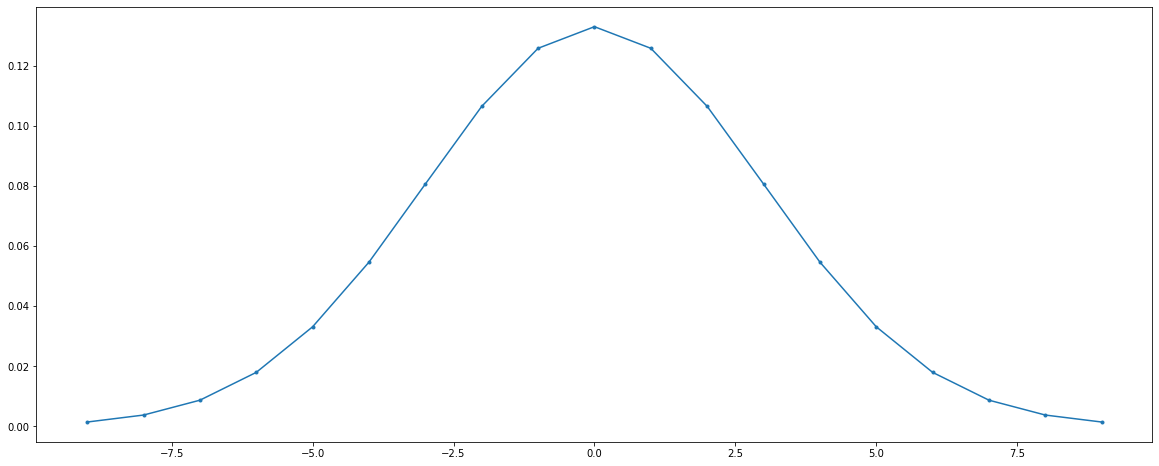

In [ ]:
## function gauss
sigma = 3
Gx,x = gauss(sigma)
plt.figure(1)
plt.plot(x, Gx, '.-')
plt.show()

##### 1-D Box Filter

Implement a method which computes the values of a 1-D Box *Bx* for a given standard deviation $\sigma$ :
\begin{equation}
B= [\frac{1}{n},\frac{1}{n},\dots,\frac{1}{n}]\in \mathbb{R}^n 
\end{equation}

The method should also return a vector *x* of values on which the **Box** filter is defined: integer values on the interval $\left[-3\sigma,3\sigma\right]$.

An example of Box Filter:

![](https://drive.google.com/uc?export=view&id=1UBpSRYNkZnK2UGmGsMSnrmzwrPyMt6Fz)

In [ ]:
def box(filter_size=3,show_verbose=False):
    """
    box function taking as argument the filter size.
    The filter should be defined for all integer values and centered at zero
    The function should return the Box values Bx computed at the indexes x
    """
    x = list(range(-(filter_size//2), filter_size//2  + 1))
    if (filter_size % 2 == 0):
      x.remove(0)
    Bx = [1/filter_size for i  in x]
    return Bx,x

################# Do not write below this line just run #################

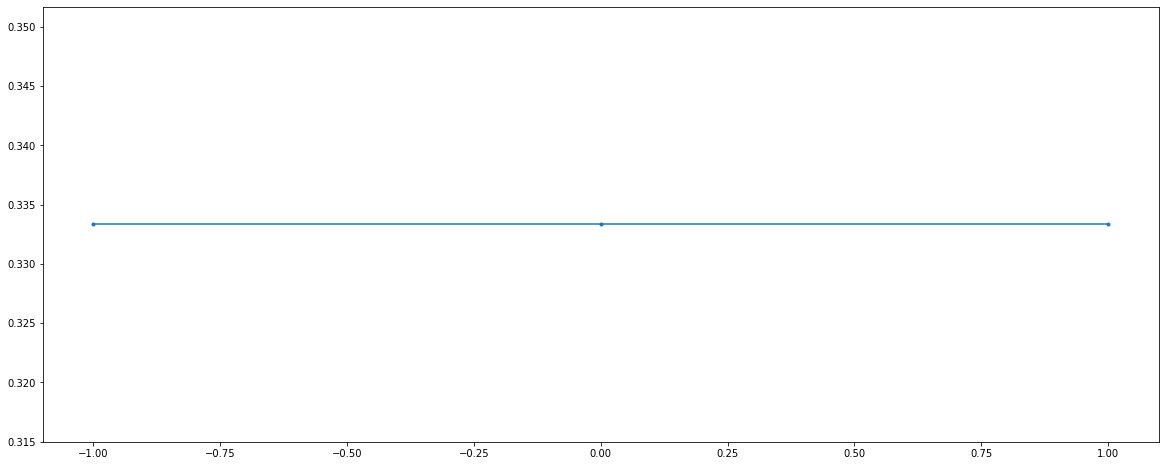

In [ ]:
## function box
size = 3
Bx,x = box(size)
plt.figure(1)
plt.plot(x, Bx, '.-')
plt.show()

##### 2-D custom filter
Recreate the given 3x3 filter:

\begin{bmatrix}
-0.015 & -0.035 & -0.015\\
-0.035 & 0.8 &  -0.035 \\
-0.015 & -0.035 & -0.015
\end{bmatrix}

 The absolute value of the elements in the kernel sum to 1, in the middle position we find 80% of the weights and in the corners 30% of the remaining percentage with negative sign.

In [ ]:
def custom():
  """
  This function returns the shown kernel.
  """
  Gx = [
        [-.015, -.035, -.015], 
        [-.035, .8, -.035], 
        [-.015, -.035, -.015]
        ]
  return Gx

################# Do not write below this line just run #################

In [ ]:
custom_filter = custom()
print(custom_filter)

[[-0.015, -0.035, -0.015], [-0.035, 0.8, -0.035], [-0.015, -0.035, -0.015]]


##### Gauss derivative 1-D
Implement a function gaussdx for creating a Gaussian derivative filter in 1D:
$$
\frac{d}{dx}G =-\frac{1}{\sqrt{2\pi}\sigma^3}x\exp({-\frac{x^2}{2\sigma^2}})
$$
As in 1.a-1.b, the function should also return a vector x of values on which the Gaussian derivative filter is
defined: integer values on the interval $[3\sigma; 3\sigma]$.

An example of Gauss derivative 1-D:

![](https://drive.google.com/uc?export=view&id=1QZmVMxJiOARKe5MoqzZ7SSSjFikoY2ty)

In [ ]:
def gaussdx(sigma):

  #####################################################
  ##                 YOUR CODE HERE                  ##
  #####################################################
  
  x = range(-3* sigma, 3* sigma +1)
  Dx= [(-1/ (((2 * np.pi)**.5 * sigma**3)))*i *np.exp(-(i**2/ (2 * sigma**2))) for i in x]

  '''
  x = range(-3 * sigma, 3 * sigma + 1)
  sub_equation = (1/(math.sqrt(2*math.pi) * (sigma ** 3)))
  Dx = [sub_equation * i * math.exp(-(i**2) / (2 * (sigma ** 2))) for i in x]
  '''

  return Dx, x

################# Do not write below this line just run #################

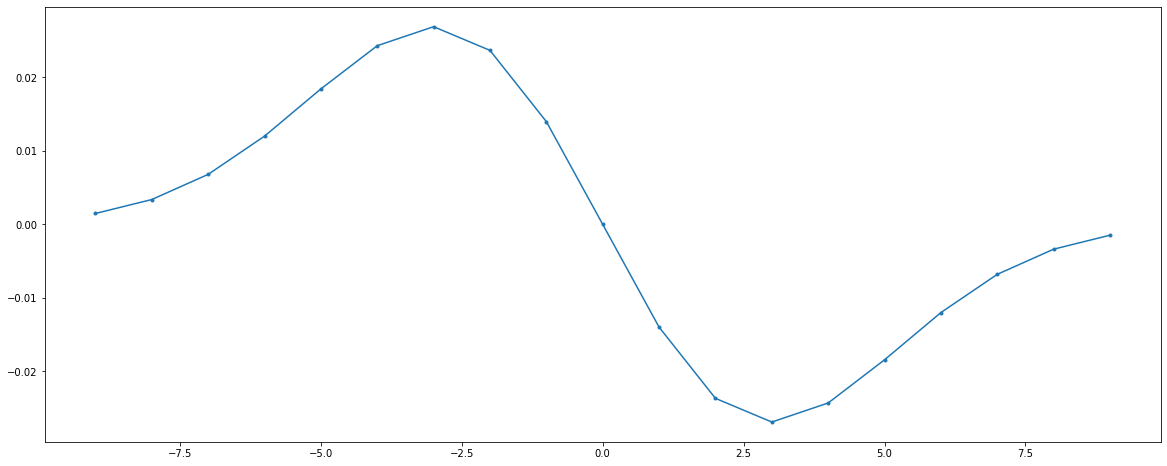

In [ ]:
## function gaussdx
sigma = 3
DGx,x = gaussdx(sigma)
plt.figure(1)
plt.plot(x, DGx, '.-')
plt.show()

#### Exercise 1.b **(3 Points)**

Here you have to convolve the filters you have just defined with the given image _'graf.png'_. Remember that "Box" and "Gaussian" filters are separable.

##### 2-D Gaussian filter
The function should take an image as an input
and return the result of convolution of this image with 2D Gaussian kernel. You can take advantage of the Python’s convolve2D function if you don’t want to
implement convolution yourself.

See figure below for illustration
of Gaussian filtering. 
![](https://drive.google.com/uc?export=view&id=1GtsTZXlnj811pJi1VnamdtDCvhqHiu8j)



##### * Added by the **group*** 

In [ ]:
from scipy import signal
from scipy import misc

def Building_2D_gauss(sigma):
  Gx, x = gauss(sigma)
  Gx = np.array(Gx).reshape(-1,1)
  kernel_2D = Gx * Gx.T
  return kernel_2D

##### Output of the gaussian kernel

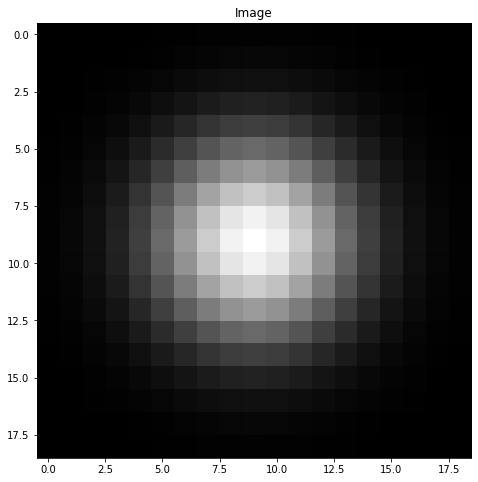

In [ ]:
plt.imshow(Building_2D_gauss(3), interpolation='none',cmap='gray')
plt.title("Image")
plt.show()

################# Do not write below this line just run #################

In [ ]:
def gaussfiltering(img, sigma):
  """
  Implement a 2D Gaussian filter, leveraging the previous gauss.
  Implement the filter from scratch or leverage the convolve or convolve2D methods (scipy.signal)
  Leverage the separability of Gaussian filtering
  Input: image, sigma (standard deviation)
  Output: smoothed image
  """
  #####################################################
  ##                 YOUR CODE HERE                  ##
  #####################################################

  Gx, x = gauss(sigma)
  Gx = np.array(Gx).reshape(-1,1)
  kernel_2D = Gx * Gx.T

  
  smooth_img = signal.convolve2d(img, kernel_2D, mode='same')

  return np.array(smooth_img)

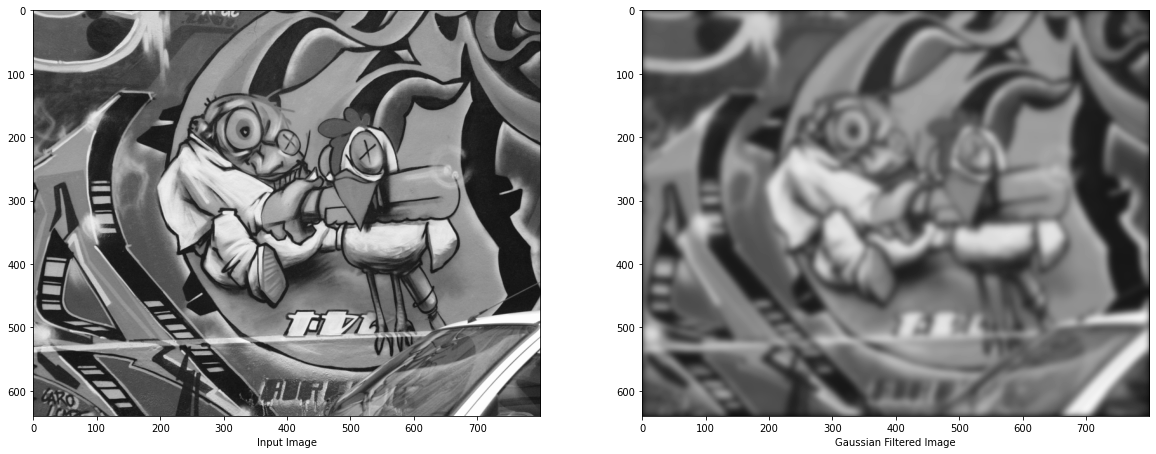

In [ ]:
img = rgb2gray(np.array(Image.open('graf.png')))
smooth_img = gaussfiltering(img, 5)
#print(smooth_img.shape)
plt.figure(2)
ax1 = plt.subplot(1,2,1)
ax1.set_xlabel('Input Image')
ax2 = plt.subplot(1,2,2)
ax2.set_xlabel('Gaussian Filtered Image')
plt.sca(ax1)
plt.imshow(img, cmap='gray', vmin=0, vmax=255)
plt.sca(ax2)
plt.imshow(smooth_img, cmap='gray', vmin=0, vmax=255)
plt.show()

##### 2-D Box filter
The function should take an image as an input
and return the result of convolution of this image with 2D Box kernel. 

See figure below for illustration of Box filtering.

![Original Image](https://drive.google.com/uc?export=view&id=1IMrJUuTouVHmaiiyWB6H1QbKLzYTg9qC)



In [ ]:
def boxfiltering(img, filter_size):
  """
  Implement a 2D Box filter, leveraging the previous box.
  Leverage the separability of Box filtering
  Input: image, filter_size
  Output: smoothed image
  """
  #####################################################
  ##                 YOUR CODE HERE                  ##
  #####################################################

  Bx, x = box(filter_size)
  Bx_mat = np.array(Bx).reshape(-1,1)
  By_mat = np.array(Bx).reshape(1,-1)
  Bxy = Bx_mat * By_mat
  
  smooth_img = signal.convolve2d(img, Bxy, mode='same')

  return np.array(smooth_img)

################# Do not write below this line just run #################

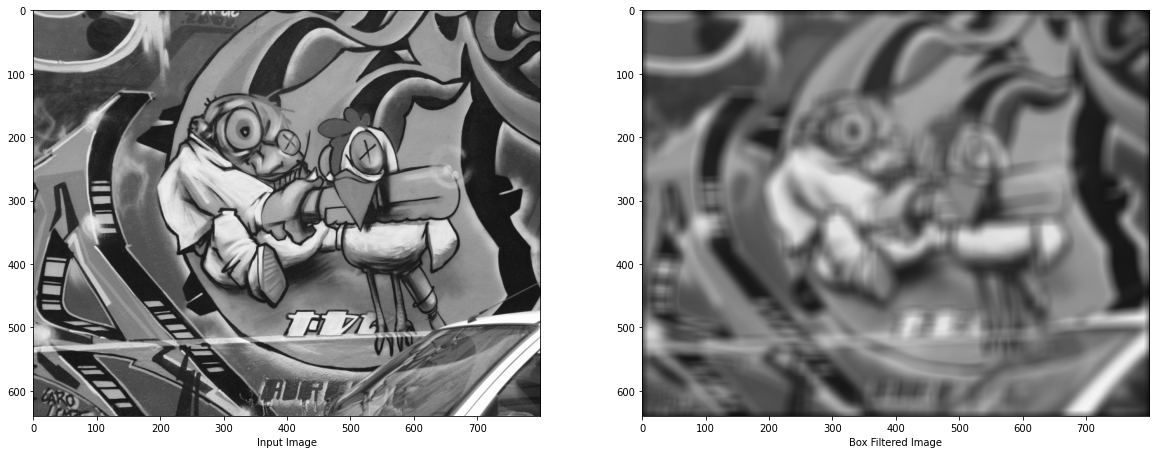

In [ ]:
img = rgb2gray(np.array(Image.open('graf.png')))
smooth_img = boxfiltering(img, 20)
plt.figure(2)
ax1 = plt.subplot(1,2,1)
ax1.set_xlabel('Input Image')
ax2 = plt.subplot(1,2,2)
ax2.set_xlabel('Box Filtered Image')
plt.sca(ax1)
plt.imshow(img, cmap='gray', vmin=0, vmax=255)
plt.sca(ax2)
plt.imshow(smooth_img, cmap='gray', vmin=0, vmax=255)
plt.show()

##### Custom Filter

The function should take an image and return the result of the convolution of this image with the custom filter we have defined in exercise 1.a.

See figure below for an illustration of this custom filter.

![](https://drive.google.com/uc?export=view&id=1N1wEkhqOuAX3TusQNNxN9KPOXb9nRsFn)



In [ ]:
def customfiltering(img):
  """
  Implement a 2D Custom filter
  Implement the filter from scratch 
  Input: image
  Output: smoothed image
  """
  #####################################################
  ##                 YOUR CODE HERE                  ##
  #####################################################

  Cxy = custom()
  
  smooth_img = signal.convolve2d(img, Cxy, mode='same')

  return np.array(smooth_img)

################# Do not write below this line just run #################

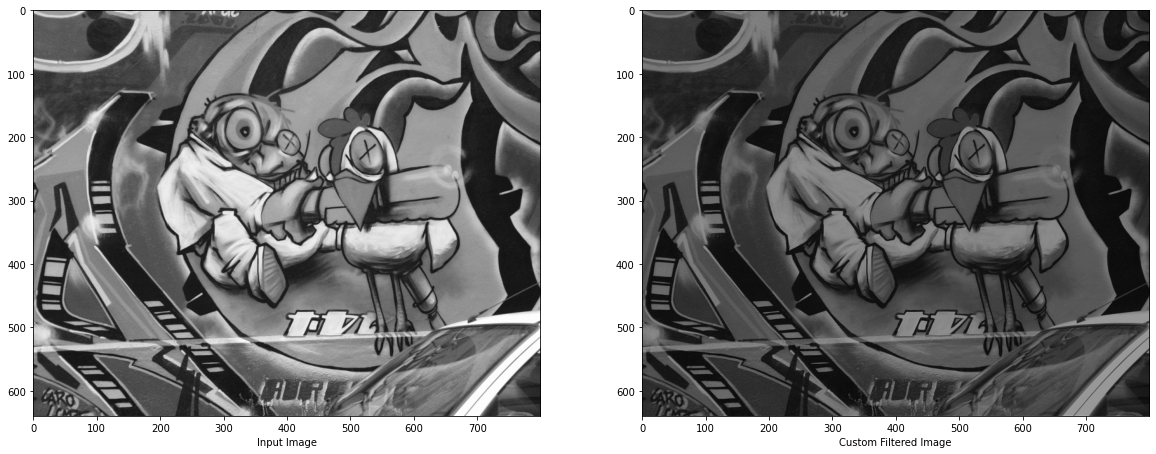

In [ ]:
img = rgb2gray(np.array(Image.open('graf.png')))
smooth_img = customfiltering(img)
#print(smooth_img.shape)
plt.figure(2)
ax1 = plt.subplot(1,2,1)
ax1.set_xlabel('Input Image')
ax2 = plt.subplot(1,2,2)
ax2.set_xlabel('Custom Filtered Image')
plt.sca(ax1)
plt.imshow(img, cmap='gray', vmin=0, vmax=255)
plt.sca(ax2)
plt.imshow(smooth_img, cmap='gray', vmin=0, vmax=255)
plt.show()

#### Exercise 1.c **(1 Points)**

Implement a Gaussian Pyramid: Write a function for downscaling (you can use the function [resize from cv2](https://docs.opencv.org/master/dd/d52/tutorial_js_geometric_transformations.html) library) and use the Gaussian filter to blur it. The Pyramid must consist of three steps: 

* Apply Gaussian filter on original Image
* Resize (Downscale) the smoothed image (obtained from previous step) and apply Gaussian filter again.
* Resize (Downscale) the smoothed image (obtained from previous step) and apply Gaussian filter again.

See figure below for an illlustration of Gaussian Pyramid.
![](https://drive.google.com/uc?export=view&id=1JKeyNozWgoBWHqrUwj4SEF6SJEnO9uMt)


In [ ]:
def downscale(img, factor):
  '''
  This function should return the given image
  resized by the factor.
  Input:
    img: the image to resize
    factor: the factor you want use to downscale
  Output:
    resized: the resized image
  '''
  #####################################################
  ##                 YOUR CODE HERE                  ##
  #####################################################
  down_width = img.shape[1] 
  down_height = img.shape[0] 
  tuple1 = (int(down_width*factor), int(down_height*factor))
  resized_img = cv2.resize(img, tuple1)

  return resized_img

In [ ]:
def GaussianPyramid(img, steps=3, factor=0.5, sigma=4):
  '''
  This function implements the Gaussian Pyramid and shows the results.
  Leverage the "downscale" function.
  
  Inputs:
    img: the image
    steps: number of steps to use in performing the Pyramid
    factor: the scaling factor to resize the image at each step
    sigma: the Gaussian filter parameter
  
  Output:
    --
  '''
  #####################################################
  ##                 YOUR CODE HERE                  ##
  #####################################################
  images = [img] # index 0
  for i in range(steps):
    images.append(gaussfiltering(images[i*2], sigma)) # first smooth index 1 
    images.append(downscale(images[i*2+1], factor)) # first downsample index 2

  x,y = 20,8 
  for i in range(len(images)//2):
    LY, LX = len(images[i*2]), len(images[i*2][0])
    plt.rcParams["figure.figsize"] = (x,y)
    x,y = x*factor, y*factor
    plt.figure(2)
    ax1 = plt.subplot(1,2,1)
    ax1.title.set_text(('resized image (' if i!=0 else 'original image (')+ str(LY)+", "+str (LX)+')' )
    ax2 = plt.subplot(1,2,2)
    ax2.title.set_text('smoothed image ('+ str (LY)+", "+str (LX)+')' )
    plt.sca(ax1)
    plt.imshow(images[i*2], cmap='gray', vmin=0, vmax=255)
    plt.sca(ax2)
    plt.imshow(images[i*2+1], cmap='gray', vmin=0, vmax=255)
  
    plt.show()
  return 

################# Do not write below this line just run #################

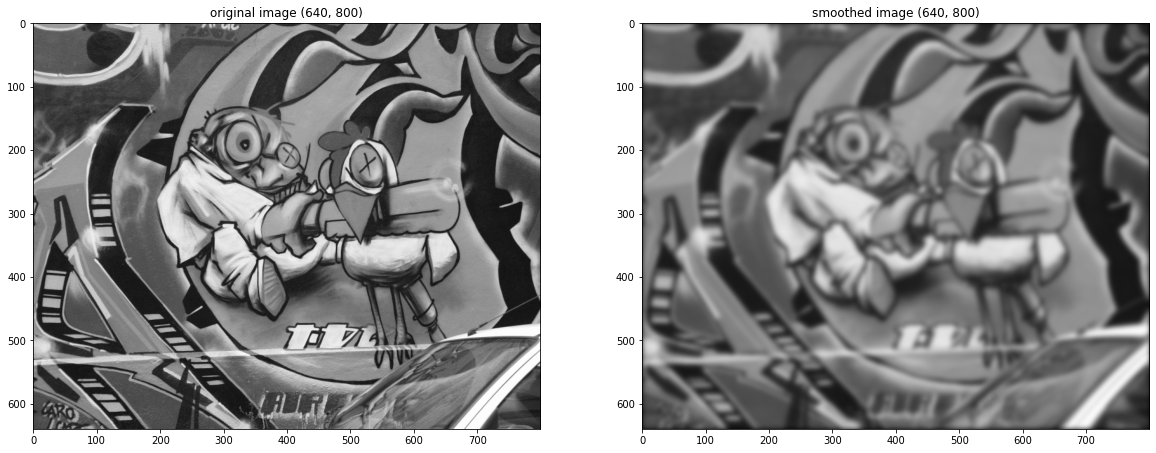

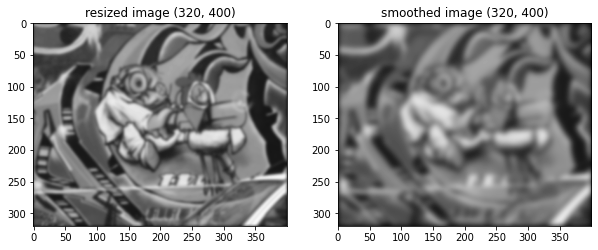

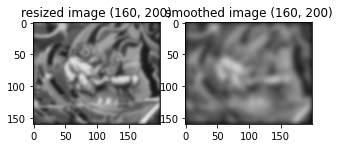

In [ ]:
img = rgb2gray(np.array(Image.open('graf.png')))
GaussianPyramid(img)

In [ ]:
# reset to the default configuration
plt.rcParams["figure.figsize"] = (20,8)

### Exercise 1 - Report **(2 Points)**

Use the images from the previous exercises to write a report on what you learned about filters and convolutions **(in the text block below)**.
In report, you should also compare your results: use the three filters you just created and apply on 'brick_aliasing.jpg' file and identify which filter is applied on Image A, Image B and Image C illustrated in Figure below. Use 7 as filter_size both for Gaussian and Box filter.

![](https://drive.google.com/uc?export=view&id=1eDOTU7FIRht9WMiAeW3ZlsFnpAlW_ZGm)

#####Report: 1.what we have learned


######Gaussion filtering:
Gaussian filtering is used to blur images and remove noises and details. Gaussian filters might not preserve image brightness.
The kernel coefficients decrease with increasing the distance from the kernel’s center. Central pixels have higher weights than those on the periphery (As we can see in the image of exercise 1.b, 2-D Gaussian filter). Gaussian kernel coefficients depend on the value of sigma(σ). <br />

At the edge of the mask, coefficients must be close to 0. Also Sigma defines the **intensity** of smoothing (By increasing the sigma the image will be more smoothed).
In this example, we can limit the kernel size to contain only the values that are in range [-3σ, 3σ] from the mean of the values.

When we’re working with 2D images we need to use the 2D Gaussian filter. This can be done simply by producting the two 1D Gaussian filters. ( kernel_2D = kernel_1D * kernel_1D.T )


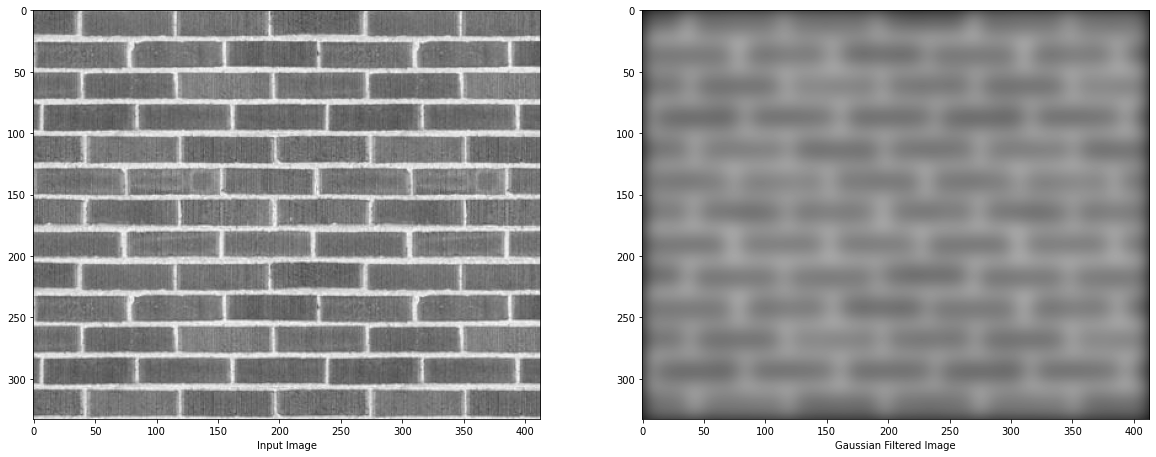

In [ ]:
img = rgb2gray(np.array(Image.open('brick_aliasing.jpg')))
smooth_img = gaussfiltering(img, 7)
plt.figure(2)
ax1 = plt.subplot(1,2,1)
ax1.set_xlabel('Input Image')
ax2 = plt.subplot(1,2,2)
ax2.set_xlabel('Gaussian Filtered Image')
plt.sca(ax1)
plt.imshow(img, cmap='gray', vmin=0, vmax=255)
plt.sca(ax2)
plt.imshow(smooth_img, cmap='gray', vmin=0, vmax=255)
plt.show()

######Box filtering:
It is one type of average filters which replaces each pixel's value with the average of its neighbor pixels. By replacing with the average we remove the noise from the images, but fine details are also lost in the process. 

Average filtering masks with positive entires that sum to 1.


In average filter if all the coefficient values have the same weight, we have Box filter. 



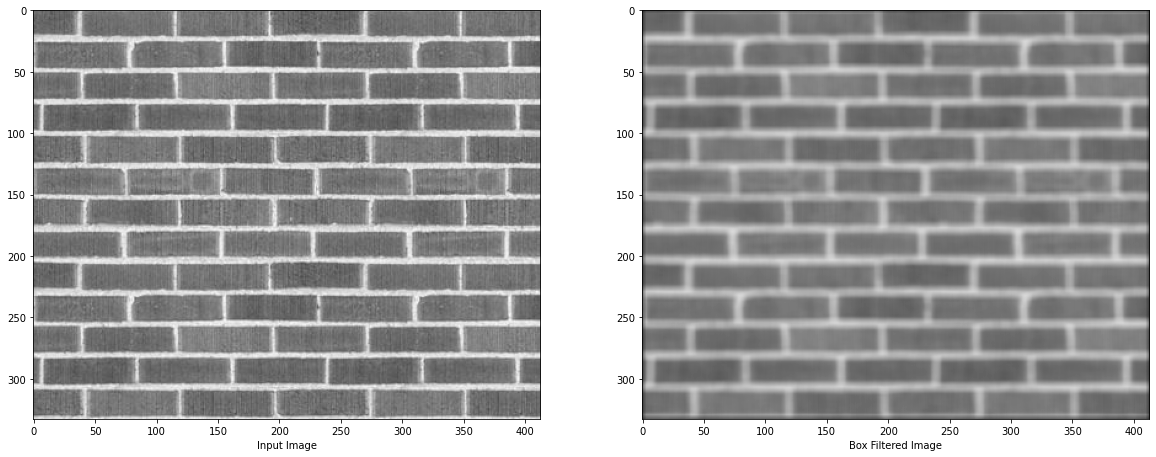

In [ ]:
img = rgb2gray(np.array(Image.open('brick_aliasing.jpg')))
smooth_img = boxfiltering(img, 7)
plt.figure(2)
ax1 = plt.subplot(1,2,1)
ax1.set_xlabel('Input Image')
ax2 = plt.subplot(1,2,2)
ax2.set_xlabel('Box Filtered Image')
plt.sca(ax1)
plt.imshow(img, cmap='gray', vmin=0, vmax=255)
plt.sca(ax2)
plt.imshow(smooth_img, cmap='gray', vmin=0, vmax=255)
plt.show()

######Custom filtering:
A kernel is a matrix of numbers that is used in image convolutions. Kernels with different size contain different patterns of numbers which produce different results under convolution. The size of a kernel is arbitrary but 3x3 is often used. In custom filter we define a 3x3 matrix as a kernel and convolve it with the image.


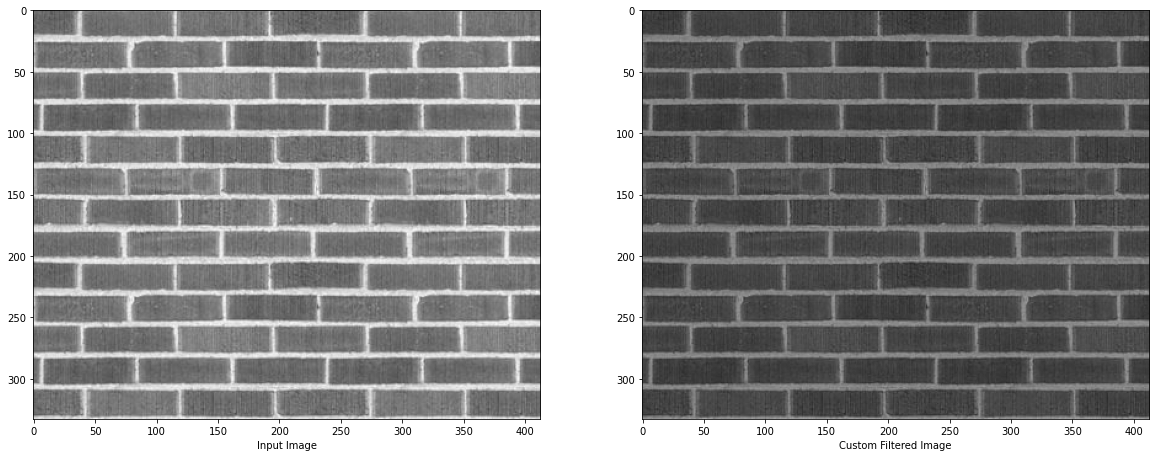

In [ ]:
img = rgb2gray(np.array(Image.open('brick_aliasing.jpg')))
smooth_img = customfiltering(img)
#print(smooth_img.shape)
plt.figure(2)
ax1 = plt.subplot(1,2,1)
ax1.set_xlabel('Input Image')
ax2 = plt.subplot(1,2,2)
ax2.set_xlabel('Custom Filtered Image')
plt.sca(ax1)
plt.imshow(img, cmap='gray', vmin=0, vmax=255)
plt.sca(ax2)
plt.imshow(smooth_img, cmap='gray', vmin=0, vmax=255)
plt.show()

#####Report 2. Comparison
- Gaussian filter and box filter are separable. (G(x, y) = G(x) G(y)). First convolve each row with a 1D filter and the same process goes for each column. 

- In Gaussian filters the further pixels get lower weights, while in Box filter the pixels around the center are given equal weights,regardless of the distance from the center pixel.


- Box-filters can be calculated faster than Gaussian filters.
In Gaussian filter we lose more fine image detail and contrast.
In non-Gaussian filters, we can see all the sharp edges. When compared with the Gaussian, we get a nice smoothed and blurred new image.


#####Report 3.result:
 

- Image A filter -> Gussian filter
- Image B filter -> Box filter
- Image C filter -> Custom filter

## Question 2: Identification **(10 Points)**

Import some useful libraries

In [ ]:
## import packages
import numpy as np
from PIL import Image
from numpy import histogram as hist
import matplotlib.pyplot as plt
import itertools

In [ ]:
def rgb2gray(rgb):
  r, g, b = rgb[:, :, 0], rgb[:, :, 1], rgb[:, :, 2]
  gray = 0.2989 * r + 0.5870 * g + 0.1140 * b
  return gray

### Exercise 2 - Code

#### Exercise 2.a **(3 Points)**
For this question,  implement the
function **normalized hist**, which takes gray-value image as input and returns normalized histogram of
pixel intensities. When quantizing the image to compute the histogram, consider that pixel intensities
range in $[0, 255]$.
Compare your implementation with built-in Python function numpy.histogram. Your histograms and
histograms computed with Python should be approximately the same. (3 points)

In [ ]:
def normalized_hist(img_gray, num_bins = 40, show_verbose = False):
  '''
  Compute histogram of image intensities, histogram should be normalized so that sum of all values equals 1
  assume that image intensity is between 0 and 255

  img_gray - input image in grayscale format
  num_bins - number of bins in the histogram

  '''
  #####################################################
  ##                 YOUR CODE HERE                  ##
  #####################################################
  # first method
  # step = 255/num_bins
  # bins = np.arange(0,256,step)
  # hists = np.zeros((num_bins))
  # for i in img_gray.flatten():
  #   for k in range(num_bins+1):
  #     if (i >= k*step and i < (k+1)*step):
  #      hists[k] += 1

  # Better approach
  bins = np.linspace(0, 255+1e-10, num_bins+1)
  hists = np.zeros((num_bins))
  index = np.searchsorted(bins, img_gray.flatten()) -1
  for i in index:
    hists[i]+=1
    
  return hists/hists.sum(), bins

################# Do not write below this line just run #################

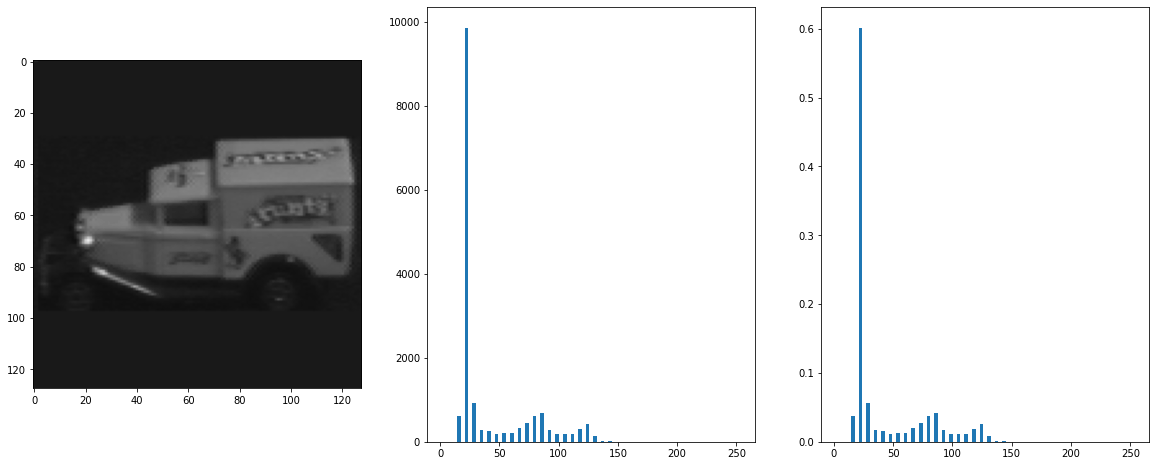

In [ ]:
img_color = np.array(Image.open('model/obj100__0.png'))
img_gray = rgb2gray(img_color.astype('double'))

plt.figure(1)
plt.subplot(1,3,1)
plt.imshow(img_gray,cmap='gray', vmin=0, vmax=255)

plt.subplot(1,3,2)
num_bins_gray = 40
hist_gray1, bin_gray1 = hist(img_gray.reshape(img_gray.size), num_bins_gray,(0,255))
plt.bar((bin_gray1[0:-1] + bin_gray1[1:])/2, hist_gray1, width=3)

plt.subplot(1,3,3)
hist_gray2, bin_gray2 = normalized_hist(img_gray, num_bins_gray)
plt.bar((bin_gray2[0:-1] + bin_gray2[1:])/2, hist_gray2, width=3)
plt.show()

#### Exercise 2.b **(6 Points)**
Implement the histogram types. Your implementation should
complete the scripts provided in the functions rgb_hist, rg_hist and dxdy_hist.
As above, when quantizing the images to compute the histogram, consider that “RGB” and “RG” range in
$[0, 255]$. For the case of dxdy hist, the actual image value ranges depend on the chosen Gaussian filtering
variance, used when computing the derivative. For this exercise, set the standard deviation $σ = 3.0$ and
cap the pixel values to be in the range $[−6, 6]$, i.e. set all values below (above) the value of -6 (+6) to -6
(+6). (3 points)

##### RGB

In [ ]:
def rgb_hist(img_color_double, num_bins = 5, show_verbose = False):
  '''
  Compute the *joint* histogram for each color channel in the image
  The histogram should be normalized so that sum of all values equals 1
  Assume that values in each channel vary between 0 and 255

  img_color - input color image
  num_bins - number of bins used to discretize each channel, total number of bins in the histogram should be num_bins^3

  E.g. hists[0,9,5] contains the number of image_color pixels such that:
      - their R values fall in bin 0
      - their G values fall in bin 9
      - their B values fall in bin 5
  '''
  #####################################################
  ##                 YOUR CODE HERE                  ##
  #####################################################
  '''
  hists = np.zeros((num_bins, num_bins, num_bins))
  b_rg = np.arange(0,256, 255//num_bins)
  print(b_rg)

  for i in range(num_bins):
    for j in range(num_bins):
      for k in range(num_bins):
        pixels = np.where(
          ((img_color_double[:,:,0] >= b_rg[i]) & (img_color_double[:,:,0] <= b_rg[i+1])) &
          ((img_color_double[:,:,1] >= b_rg[j]) & (img_color_double[:,:,1] <= b_rg[j+1])) &
          ((img_color_double[:,:,2] >= b_rg[k]) & (img_color_double[:,:,2] <= b_rg[k+1]))
        )
        hists[i][j][k] = len(img_color_double[pixels])

  hists = hists.flatten()
  '''
  bins, res = np.linspace(0, 255+1e-10, num_bins+1), []
  hists = np.zeros((num_bins, num_bins, num_bins))
  for c in range(3):
    Values = np.searchsorted(bins,np.array(img_color_double[:, :,c]).flatten())-1
    res.append(Values)
  for i in range(res[0].size):
    hists[res[0][i],  res[1][i], res[2][i]]+=1
  hists = hists.flatten()
  return hists/hists.sum()

################# Do not write below this line just run #################

<BarContainer object of 125 artists>

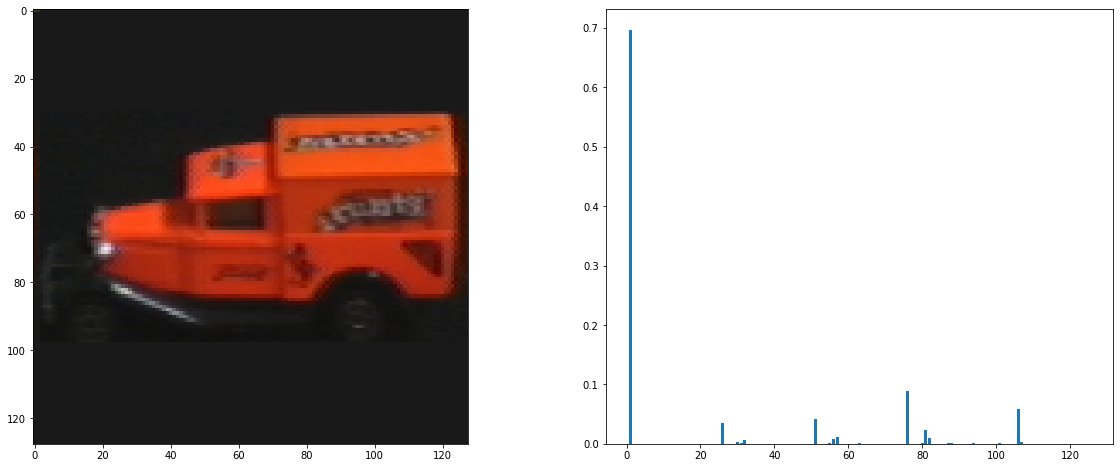

In [ ]:
# Compose and test RGB histograms (rgb_hist)
plt.figure(2)
plt.subplot(1,2,1)
plt.imshow(img_color)

num_bins_color = 5

plt.subplot(1,2,2)
hist_rgb1 = rgb_hist(img_color.astype('double'), num_bins_color)
plt.bar(np.array(range(1, hist_rgb1.size+1)),hist_rgb1)


##### RG

In [ ]:
def rg_hist(img_color_double, num_bins = 5, show_verbose = False):
  '''
  Compute the *joint* histogram for the R and G color channels in the image
  The histogram should be normalized so that sum of all values equals 1
  Assume that values in each channel vary between 0 and 255

  img_color - input color image
  num_bins - number of bins used to discretize each channel, total number of bins in the histogram should be num_bins^2

  E.g. hists[0,9] contains the number of image_color pixels such that:
      - their R values fall in bin 0
      - their G values fall in bin 9
  '''
  #####################################################
  ##                 YOUR CODE HERE                  ##
  #####################################################
  '''
  hists = np.zeros((num_bins, num_bins))

  b_rg = np.arange(0,256, 255//num_bins)

  for i in range(num_bins):
    for j in range(num_bins):
      pixels = np.where(
        ((img_color_double[:,:,0] > b_rg[i]) & (img_color_double[:,:,0] <= b_rg[i+1])) &
        ((img_color_double[:,:,1] > b_rg[j]) & (img_color_double[:,:,1] <= b_rg[j+1]))
      )
      
      hists[i][j] = len(img_color_double[pixels])        
  hists = hists.flatten()
  '''
  bins, res = np.linspace(0, 255+1e-10, num_bins+1), []
  hists = np.zeros((num_bins, num_bins))
  for c in range(2):
    Values = np.searchsorted(bins,np.array(img_color_double[:, :,c]).flatten())-1
    res.append(Values)
  for i in range(res[0].size):
    hists[res[0][i], res[1][i]]+=1
  hists = hists.flatten()
  return hists/hists.sum()

################# Do not write below this line just run #################

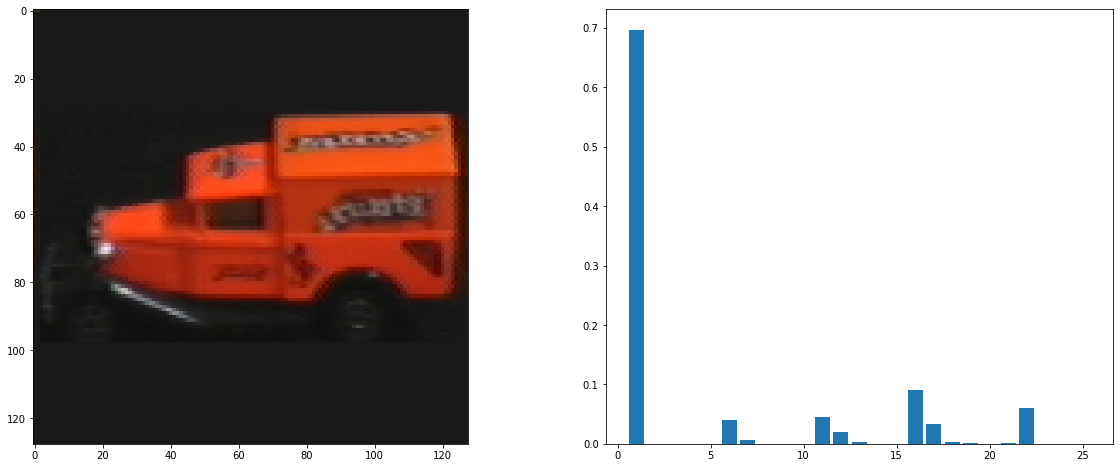

In [ ]:
#Compose and test RG histograms (histogram_module.rg_hist)
plt.figure(3)
plt.subplot(1,2,1)
plt.imshow(img_color)

num_bins_color = 5
plt.subplot(1,2,2)
hist_rg = rg_hist(img_color.astype('double'), num_bins_color)
plt.bar(np.array(range(1,hist_rg.size+1)),hist_rg)
plt.show()

##### DXDY

In [ ]:
def gaussderiv(img, sigma):

  #####################################################
  ##                 YOUR CODE HERE                  ##
  #####################################################
   Dx,_ = gaussdx(sigma)
   Dx = np.array(Dx).reshape(1,-1)
   Dy = Dx.T
   imgDx = conv2(img, Dx, mode='same')
   imgDy = conv2(img, Dy, mode='same')
   return imgDx, imgDy

In [ ]:
def dxdy_hist(img_gray, num_bins = 5, show_verbose = False):
  '''
  Compute the *joint* histogram of Gaussian partial derivatives of the image in x and y direction
  Set sigma to 3.0 and cap the range of derivative values is in the range [-6, 6]
  The histogram should be normalized so that sum of all values equals 1

  img_gray - input gray value image
  num_bins - number of bins used to discretize each dimension, total number of bins in the histogram should be num_bins^2

  Note: you can use the function gaussderiv from the Filtering exercise
  '''
  
  #####################################################
  ##                 YOUR CODE HERE                  ##
  #####################################################
  imgDx, imgDy = gaussderiv(img_gray, 3)

  #imgDx = np.clip(imgDx,-6,6)
  #imgDy = np.clip(imgDy,-6,6)


  imgDx[imgDx < -6] = -6
  imgDx[imgDx > 6] = 6
  imgDy[imgDy < -6] = -6
  imgDy[imgDy > 6] = 6

  hists = np.zeros((num_bins, num_bins))
  
  # our bins start from 0 
  bins = np.linspace(-6, 6+ 1e-10, num_bins+1)
  
  imgDx = imgDx.reshape(imgDx.size)
  imgDy = imgDy.reshape(imgDy.size)

  for i in range(len(imgDx)):
    # Equivalent to 'bisect'
    index_dx = np.searchsorted(bins, imgDx[i])-1
    index_dy = np.searchsorted(bins, imgDy[i])-1
    hists[index_dx, index_dy] += 1
  hists = hists.reshape(hists.size)  
  return hists/hists.sum()

################# Do not write below this line just run #################

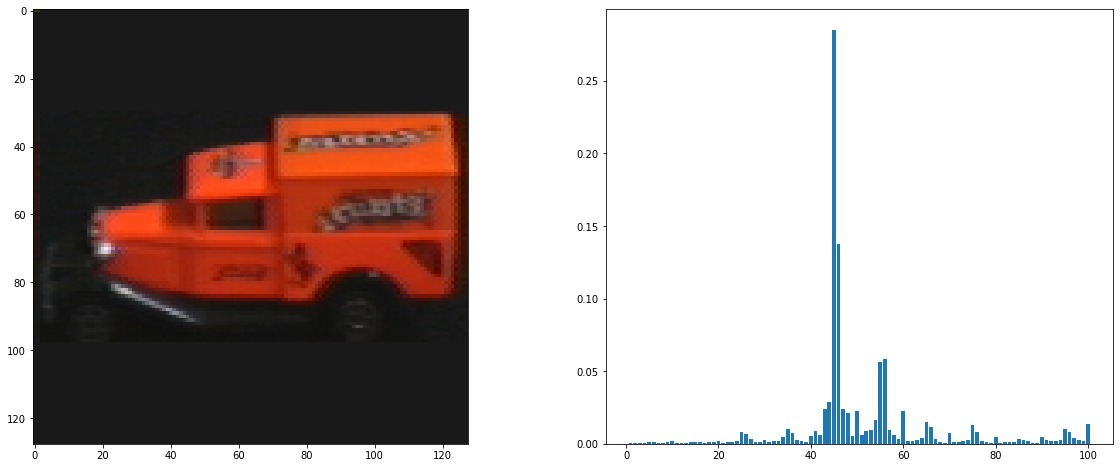

In [ ]:
#Compose and test dxdy histograms (histogram_module.dxdy_hist)
plt.figure(5)
plt.subplot(1,2,1)
plt.imshow(img_color)

num_bins_dxdy = 10
plt.subplot(1,2,2)
hist_dxdy = dxdy_hist(img_gray, num_bins_dxdy)
plt.bar(np.array(range(1,hist_dxdy.size+1)),hist_dxdy)
plt.show()

#### Exercise 2.c **(1 Point)**
Implement the histogram distance functions. 

In more details, implement the function *dist_intersect*:
\begin{equation}
\bigcap(Q,V)=1-\frac{1}{2}\left(
\frac{\sum_i \min(q_i,v_i)}{\sum_i q_i} +
\frac{\sum_i \min(q_i,v_i)}{\sum_i v_i}
\right)
\end{equation}

the *dist_l2* function:
\begin{equation}
d(Q,V)=\sqrt{\sum_i (q_i-v_i)^2}
\end{equation}

and the *dist_chi2*:
\begin{equation}
\chi^2(Q,V)=\sum_i \frac{(q_i-v_i)^2}{q_i + v_i}
\end{equation}


In [ ]:
def dist_intersect(x,y):
  '''
  Compute the intersection distance between histograms x and y
Return 1 - hist_intersection, so smaller values correspond to more similar histograms
Check that the distance range in [0,1]
  '''

  #####################################################
  ##                 YOUR CODE HERE                  ##
  #####################################################
  hist_intersection = (np.minimum(x, y).sum()/x.sum() + np.minimum(x, y).sum()/y.sum())/2
  return 1 - hist_intersection


def dist_l2(x,y):
  '''
  Compute the L2 distance between x and y histograms
  Check that the distance range in [0,sqrt(2)]
  '''
    
  #####################################################
  ##                 YOUR CODE HERE                  ##
  #####################################################
  l2_dist = (((x - y) ** 2).sum())**.5
  return l2_dist


def dist_chi2(x,y):
  '''
  Compute chi2 distance between x and y
  Check that the distance range in [0,Inf]
  Add a minimum score to each cell of the histograms (e.g. 1) to avoid division by 0
  '''

  #####################################################
  ##                 YOUR CODE HERE                  ##
  #####################################################
  x = x+1e-10
  y = y+1e-10
  top = (x - y) ** 2
  bottom = (x + y)
  chi2_dist = (top/bottom).sum()
  return chi2_dist

# implemented by group for K-means
def dist_all(x,y):
  return [
          dist_intersect(x,y), 
          dist_l2(x, y), 
          dist_chi2(x, y)
          ]

## Question 3: Object Identification **(11 Points)**

### Exercise 3 - Code **(7 Points)**

#### Exercise 3.a **(4 Points)**
Having implemented different distance functions and image histograms, you can now test how suitable
they are for retrieving images in query-by-example scenario. Implement a function find_best_match which takes a list of model images and a list of query images and for each query im-
age returns the index of closest model image. The function should take string parameters, which identify
distance function, histogram function and number of histogram bins. See comments in the beginning of
find_best_match function for more details. Additionally to the indices of the best matching images your implemen-
tation should also return a matrix which contains distances between all pairs of model and query images.
(3 points)

In [ ]:
def is_grayvalue_hist(hist_name):
  '''
  Handle function to discriminate when your input 
  function is in gray_scale or colors.
  '''
  if hist_name == 'grayvalue' or hist_name == 'dxdy':
    return True
  elif hist_name == 'rgb' or hist_name == 'rg':
    return False
  else:
    assert False, 'unknown histogram type'


def get_hist_by_name(img, num_bins_gray, hist_name):
  '''
  Handle function to get the correct historgam function 
  by his name.
  '''
  if hist_name == 'grayvalue':
    return normalized_hist(img, num_bins_gray)
  elif hist_name == 'rgb':
    return rgb_hist(img, num_bins_gray)
  elif hist_name == 'rg':
    return rg_hist(img, num_bins_gray)
  elif hist_name == 'dxdy':
    return dxdy_hist(img, num_bins_gray)
  else:
    assert False, 'unknown hist type: %s'%hist_name


def get_dist_by_name(x, y, dist_name):
  '''
  Handle function to get the correct distance function 
  by his name.
  '''
  if dist_name == 'chi2':
    return dist_chi2(x,y)
  elif dist_name == 'intersect':
    return dist_intersect(x,y)
  elif dist_name == 'l2':
    return dist_l2(x,y)
  elif dist_name == 'all':
    # implemented by group
    return dist_all(x,y)
  else:
    assert False, 'unknown distance: %s'%dist_name

def read_files():
  '''
  Handle function to read query and model files
  '''
  with open('model.txt') as fp:
    model_images = fp.readlines()
  model_images = [x.strip() for x in model_images]

  with open('query.txt') as fp:
    query_images = fp.readlines()
  query_images = [x.strip() for x in query_images]

  return query_images, model_images

In [ ]:
# note: use functions 'get_dist_by_name', 'get_hist_by_name' and 'is_grayvalue_hist' to obtain 
#       handles to distance and histogram functions, and to find out whether histogram function 
#       expects grayvalue or color image

def compute_histograms(image_list, hist_type, hist_isgray, num_bins):
  '''
  this function returns a list containing the histograms for
  the list of images given as input.
  '''
  #####################################################
  ##                 YOUR CODE HERE                  ##
  #####################################################
  
  image_hist = []
  for img in image_list:
    digital_img = np.array(Image.open(img))
    if hist_isgray:
      digital_img = rgb2gray(digital_img)

    hist = get_hist_by_name(digital_img, num_bins, hist_type)
    image_hist.append(hist)
    
  return image_hist



def find_best_match(model_images, query_images, dist_type, hist_type, num_bins):
  '''
  Function to find the best match for each image in the 
  query folder.
  Input:
    model_images: list of strings with the path of model images.
    query_images: list of strings with the path of query images.
    dist_type:    a string to represent the name of the distance you want to 
                  use. Should be one among "l2", "intersect", "chi2".
    hist_type:    a string to represent the name of the histogram you want to 
                  use. Should be one among "grayvalue", "rgb", "rg", "dxdy".
  
  Output:
    best_match:   list containing in each position the index of the retrieved
                  best matching image.
    D:            Matrix with |model_images| rows and |query_images| columns
                  containing the scores of each matching.
  '''
  #####################################################
  ##                 YOUR CODE HERE                  ##
  #####################################################  

  is_gray = is_grayvalue_hist(hist_type)
  D = np.zeros((len(query_images), len(model_images) ))
  
  query_hists = compute_histograms(query_images, hist_type, is_gray, num_bins )
  model_hists = compute_histograms(model_images, hist_type, is_gray, num_bins )

  best_match = []
  for (i, q_hist) in enumerate(query_hists):
    best = float("inf")
    best_index = 0
    for (j, m_hist) in enumerate(model_hists):
      dist = get_dist_by_name(m_hist, q_hist, dist_type)
      D[i][j] = dist
      if dist < best:
        best_index = j
        best = dist
        
    best_match.append(best_index)
      
  return np.array(best_match), D.T

################# Do not write below this line just run #################

In [ ]:
# model_images - list of file names of model images
# query_images - list of file names of query images

query_images, model_images = read_files()

dist_type = 'intersect'
hist_type = 'rgb'
num_bins = 10

[best_match, D] = find_best_match(
    model_images, query_images, dist_type, hist_type, num_bins)

print("Indexes of correct retrieved images is:\n ", *np.where(best_match == np.arange(len(query_images))))
print("The Recognition rate is", sum(best_match == np.arange(len(query_images)))/len(query_images))

Indexes of correct retrieved images is:
  [ 0  1  2  3  4  5  6  8  9 10 11 12 13 14 16 17 18 19 21 22 23 24 26 27
 28 29 30 32 33 36 37 38 39 40 42 43 44 45 46 48 49 50 51 52 54 55 56 57
 58 59 60 64 66 69 70 71 72 74 75 77 79 80 81 82 83 84 85 86 87 88]
The Recognition rate is 0.7865168539325843


#### Added by Group

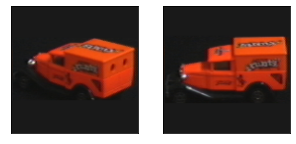

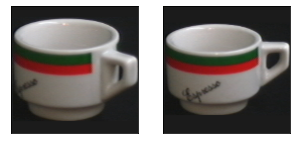

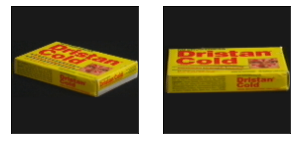

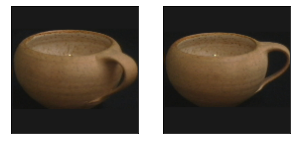

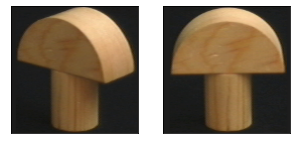

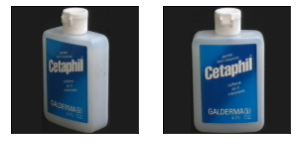

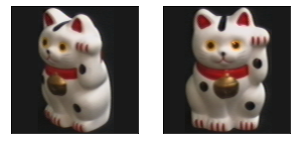

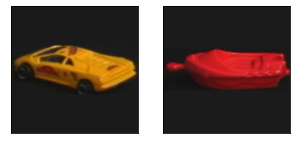

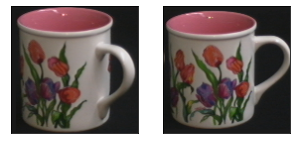

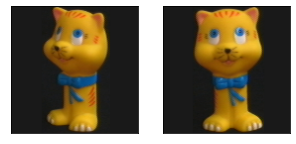

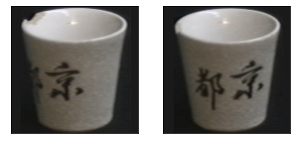

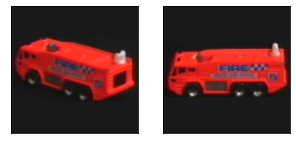

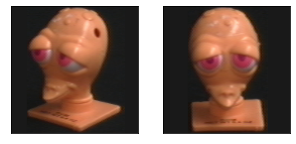

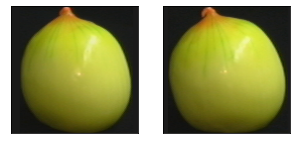

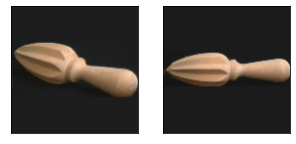

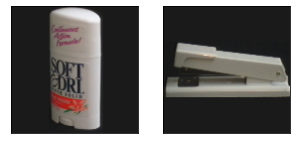

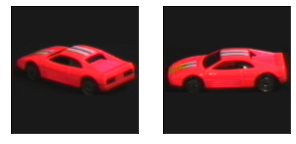

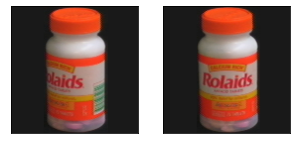

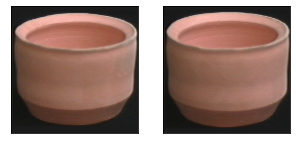

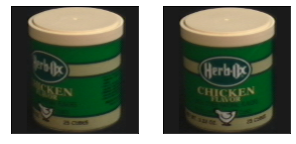

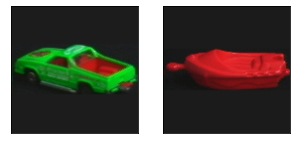

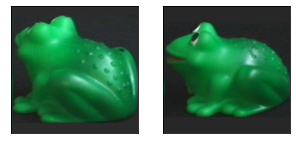

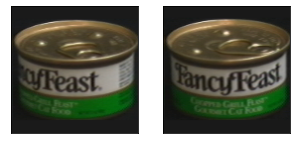

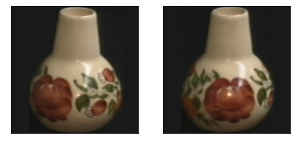

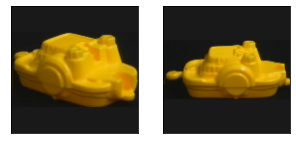

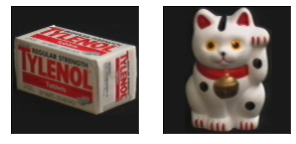

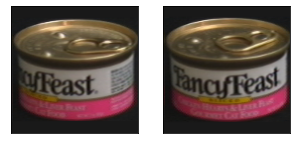

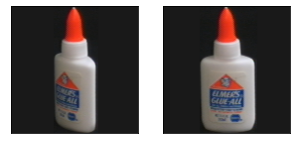

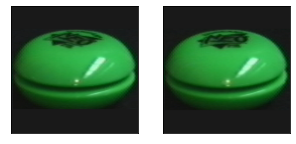

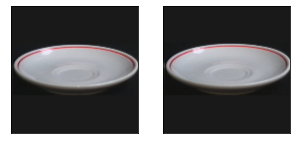

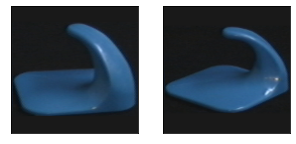

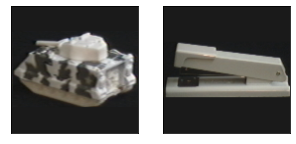

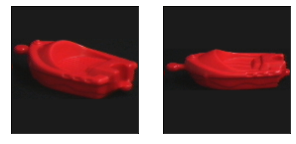

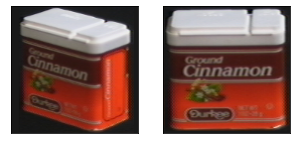

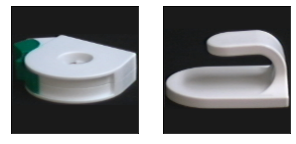

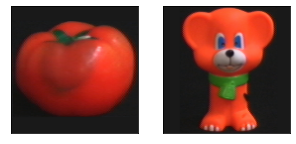

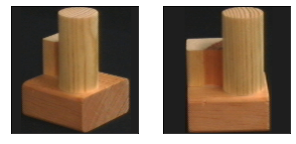

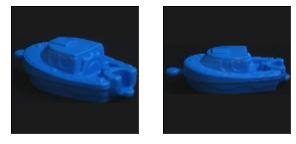

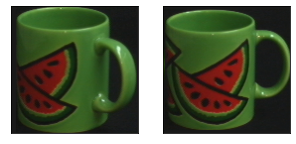

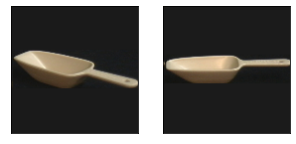

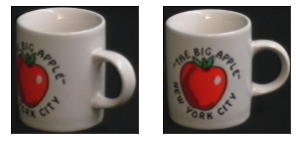

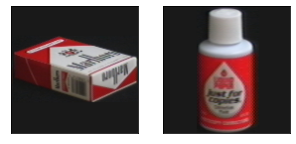

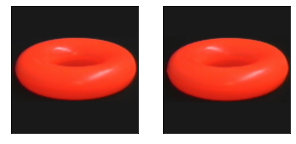

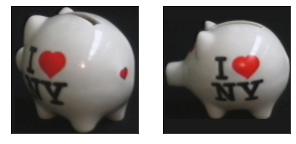

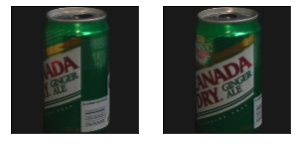

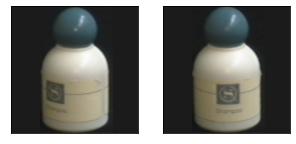

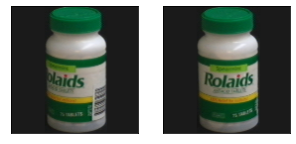

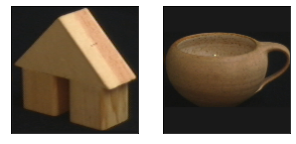

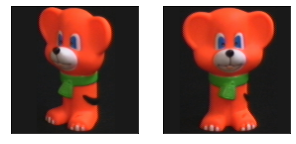

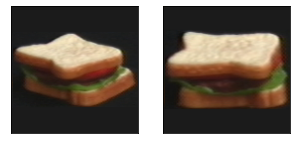

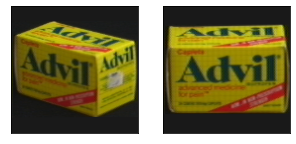

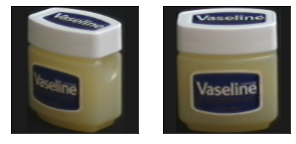

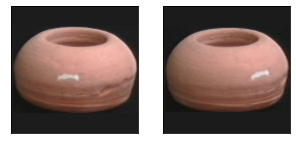

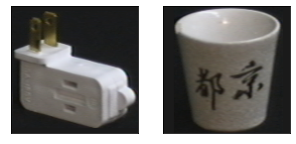

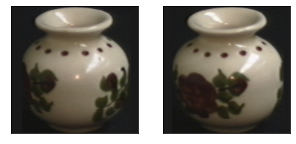

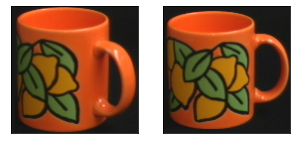

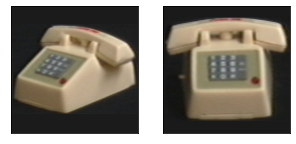

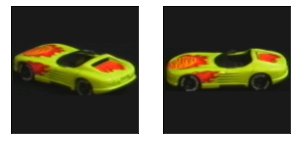

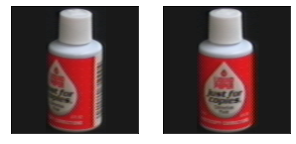

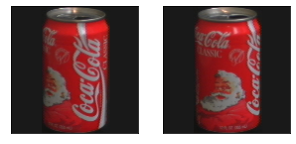

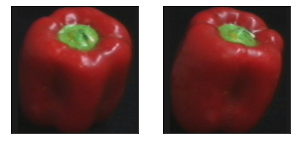

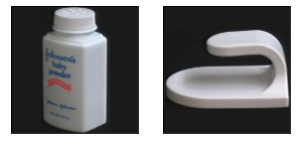

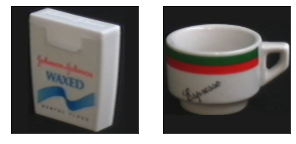

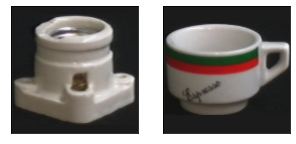

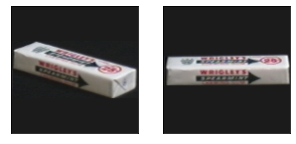

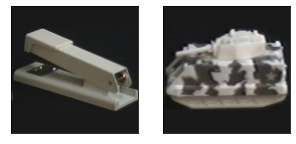

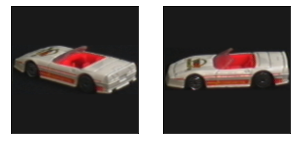

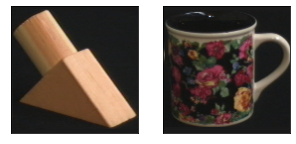

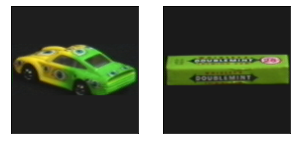

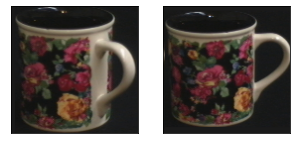

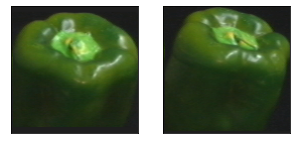

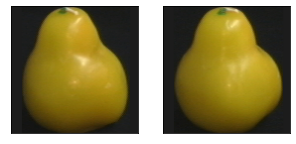

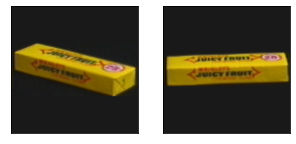

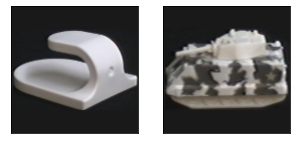

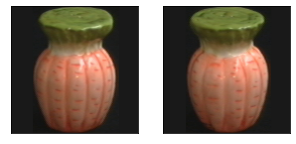

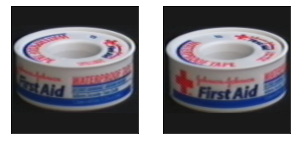

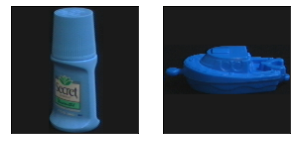

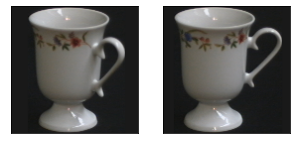

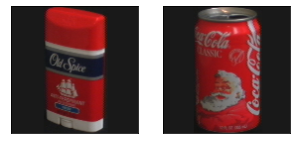

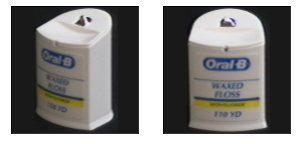

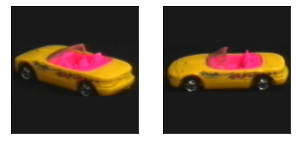

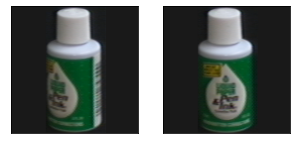

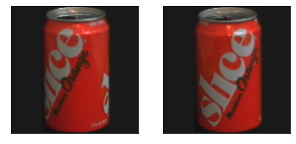

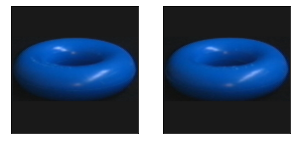

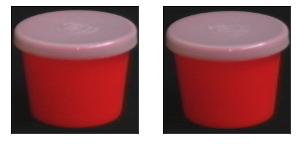

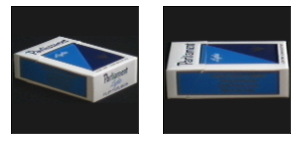

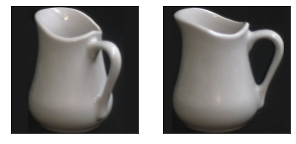

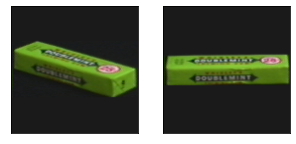

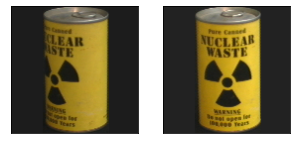

In [ ]:
plt.rcParams["figure.figsize"] = (5,3)
for (i, img) in enumerate(query_images):
  dig_query_image = np.array(Image.open(img))
  dig_best_match = np.array(Image.open(model_images[best_match[i]]))
  ax1 = plt.subplot(1,2,1)
  ax1.set_xlabel('Input Image')
  ax1.axes.xaxis.set_visible(False)
  ax1.axes.yaxis.set_visible(False)
    
  ax2 = plt.subplot(1,2,2)
  ax2.set_xlabel('Gaussian Filtered Image')
  ax2.axes.xaxis.set_visible(False)
  ax2.axes.yaxis.set_visible(False)
  plt.sca(ax1)
  plt.imshow(dig_query_image)
  plt.sca(ax2)
  plt.imshow(dig_best_match)
  plt.show()

#### Exercise 3.b **(3 Points)**
Implement a function **show_neighbors** which takes a list of model images and a list of
query images and for each query image visualizes several model images which are closest to the query image
according to the specified distance metric. Use the function find best match in your implementation. See the Figure below for example of the output.

![](https://drive.google.com/uc?export=view&id=1qlPbNzh92u9EU4kzNMbHg0uRgSk4AnRO)


In [ ]:
def show_neighbors(model_images, query_images, dist_type, hist_type, num_bins):
  '''
  For each image file from 'query_images' find and visualize the 5 nearest images from 'model_image'.

  Note: use the previously implemented function 'find_best_match'
  Note: use subplot command to show all the images in the same Python figure, one row per query image
  
  '''
  
  #####################################################
  ##                 YOUR CODE HERE                  ##
  #####################################################
  plt.rcParams["figure.figsize"] = (3,2)
  nearest_neighbors = 5 
  _, D = find_best_match(model_images, query_images, dist_type, hist_type, num_bins)
  D = D.T
  NearestNeighbors = []
  for (i, query) in enumerate(D):
    Temp = []
    for j in range(len(D[i])):
      Temp.append((j, D[i][j]))
    Temp  = sorted(Temp, key = lambda x: x[1])
    NearestNeighbors.append(Temp[:nearest_neighbors])

  for (i, img) in enumerate(query_images):

    fig = plt.figure(figsize=(15, 15))
    dig_query_image = np.array(Image.open(img))
    ax1 = plt.subplot(1,nearest_neighbors+1,1)
    ax1.set_title('Q'+str(i))
    ax1.axes.xaxis.set_visible(False)
    ax1.axes.yaxis.set_visible(False)
    plt.imshow(dig_query_image)

    for j in range(nearest_neighbors):
      Model = np.array(Image.open(model_images[NearestNeighbors[i][j][0]]))
      ax2 = plt.subplot(1,nearest_neighbors+1,j+2)
      ax2.axes.xaxis.set_visible(False)
      ax2.axes.yaxis.set_visible(False)
      ax2.set_title('MO' + '{:.2f}'.format(NearestNeighbors[i][j][1]))
      plt.imshow(Model)
    plt.show()

  return

################# Do not write below this line just run #################

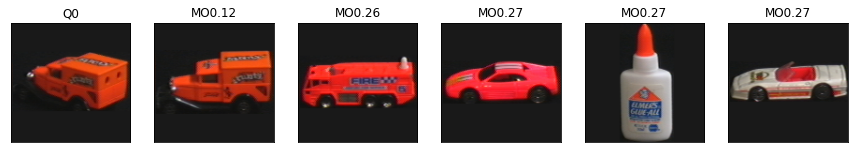

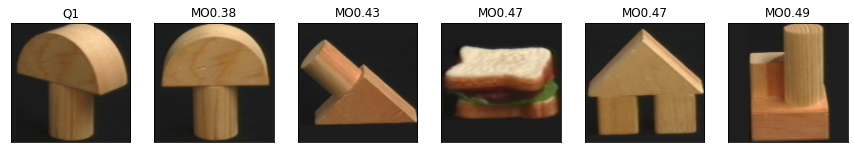

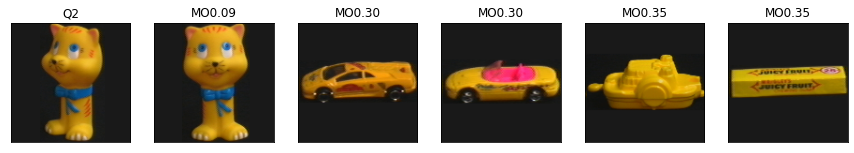

In [ ]:
## visualize nearest neighbors
query_images_vis = [query_images[i] for i in np.array([0,4,9])]
show_neighbors(model_images, query_images_vis, dist_type, hist_type, num_bins)

#### Metric
 Use the function find best match to compute recognition rate for different combinations of distance and
histogram functions. The recognition rate is given by a ratio between number of correct matches and total
number of query images.


################# Do not write below this line just run #################

In [ ]:
num_correct = sum(best_match == range(len(query_images)))
print('number of correct matches: %d (%f)\n'% (num_correct, 1.0 * num_correct / len(query_images)))

number of correct matches: 70 (0.786517)



### Report **(4 Points)** 
*TAKES TOO MUCH TIME*

Experiment with different functions and numbers of histogram bins, try to find
combination that works best. **Submit the summary of your experiments in a report as part of your solution.**


In [ ]:
Metrics, BestOut, Data  = ['intersect','l2', 'chi2'], [0,"", 0], str("#Bins, Intersect, L2, Chi2\n")
for num_bins in range(3, 101):
  Scores = []
  for Metric in Metrics:
    [best_match, D] = find_best_match(model_images, query_images, Metric, hist_type, num_bins)
    Scores.append((Metric, sum(best_match == np.arange(len(query_images)))/len(query_images)))
  Data += str(num_bins) + ',' + ",".join([str(s[1]) for s in Scores]) + '\n'
  Scores = sorted(Scores, key=lambda x:x[1])
  if Scores[-1][1] > BestOut[-1]:
    BestOut = [num_bins] + [*Scores[-1]]
print("The best combination is: " +'\'#bins\': '+ str(BestOut[0]) + " \'Metric\': "+ BestOut[1] + " \'Accuracy\': " + str(BestOut[2]))

The best combination is: '#bins': 21 'Metric': chi2 'Accuracy': 0.9101123595505618


In [ ]:
import pandas as pd
from io import StringIO
def highlight_cells(x):
    MaxLocs, df = [x[i].idxmax() for i in x], x.copy()
    df.loc[:,:] = '' 
    for j in range(1, len(MaxLocs)):
      df.iloc[MaxLocs[j], j] = 'background-color: yellow' 
      df.iloc[MaxLocs[j], 0] = 'background-color: yellow' 
    i, j = BestOut[0] - 3 , (1 if BestOut[1] == 'interest' else (2 if BestOut[1]== 'l2' else 3))
    df.iloc[i , j] = 'background-color: springgreen'
    df.iloc[i , 0] = 'background-color: springgreen'
    return df
datacsv = StringIO(Data)
pd.read_csv(datacsv, sep=",").style.apply(highlight_cells, axis=None)

######**Conclusion**
Some of the results are summerized in the table below.


|  | Number of Bins | Metric(Distance Metric) | Accuracy |
|---|---|---|---|
| 1. |  3 | intersect | 0.7191011235955056 |
| 2. |  3 | l2 | 0.6292134831460674 |
| 3. |  3 | chi2 | 0.797752808988764 |
| 4. |  30| intersect | 0.8089887640449438 |
| 5. |  30|  l2| 0.39325842696629215 |
| 6. |  30|  chi2| 0.797752808988764 |
| 7. |  50| intersect | 0.7865168539325843 |
| 8. |  50|  l2| 0.34831460674157305 |
| 9. |  50|  chi2| 0.7752808988764045 |
| 10.|  70| intersect | 0.7640449438202247  |
| 11.|  70|  l2| 0.3146067415730337 |
| 12.|  70|  chi2| 0.7752808988764045 |
| 13.|  100| intersect | 0.6853932584269663 |
| 14.|  100|  l2| 0.2696629213483146 |
| 15.|  100|  chi2| 0.7191011235955056 |


######**Outcome**
- The best accuracy we have reached with **L2 metric** was no more than 68% with num_bins equal to 4. (highlighted by **yellow**)
- With **intersect metric** we achieved 91% of accuracy with num_bins equal to 32. (highlighted by **yellow**)
- **Chi2 metric** gave us the same 91% of accuracy but with lower number of bins (cheaper computational cost). (highlighted by **Green**)

**So, the best combination would be**:
```
num_bins = 21
dist_type : 'chi2'
Recognition_rate : 0.9101123595505618
```

## Question 4: [K-Means]((https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1)) 
###(Bonus question for **5 Points**, not compulsory)

Recolor the original images and Query images by using Kmeans. And find the best matches between the two.

There are several way to preprocess an image, and in this exrcise you will work with "recoloration". Given an image, you will use a Kmeans model to transform it, and use the same model to transform the images that belongs to the model folder, then repeat the previous to exercises to extract the RGB hist and find the best match. We'll provide the method to fit a KMeans model on an image and to transform an image given a KMeans model. You should then use these functions, applying them on the query images (to retrieve recolored images and a KMeans_model for each query image) and on the model images. Pay attention on the fact that you should use a model fitted on a query image on the whole model folder to have coherent results.

In the following example, the KMeans model has been fitted on three different images: [Row 1] then these models are used to transform original images to recolored images [Row 2:4]

![](https://drive.google.com/uc?export=view&id=1m0Wu2n12BflIwMHL1g3LUxHurotxrPWr)

#### Exercise 4 - Code **(3 Points)**


In [ ]:
from sklearn.cluster import KMeans
import numpy as np

def fitting_kmeans(query, K):
  '''
  fit a Kmeans model on 1 image.
  return the recolored image and the KM model
  '''
  shape_ = query.shape

  kmeans = KMeans(K)
  data = query.reshape(-1, 3)
  kmeans.fit(data)
  query_recolored = kmeans.cluster_centers_[kmeans.predict(data)]

  return query_recolored.reshape(shape_), kmeans


def apply_kmeans(km_model, model_image):
  '''
  transform with a Kmeans model 1 image.
  return the recolored image.
  '''

  shape_ = model_image.shape
  data = model_image.reshape(-1, 3)
  img_recolored = km_model.cluster_centers_[km_model.predict(data)]

  return img_recolored.reshape(shape_)

In [ ]:
def compute_KM_histograms(image_list, num_bins=10):
  '''
  Function to compute histograms of a list of images.
  Leverage the "rgb_hist" function previously coded.
  '''

  #####################################################
  ##                 YOUR CODE HERE                  ##
  #####################################################
  image_hist = []
  for img in image_list:
    hist = rgb_hist(img.astype('double'), num_bins)
    image_hist.append(hist)
    
  return image_hist


In [ ]:
def compute_KMeans(model_list, query_list, K):
  '''
  Function to compute the recolored images from both query and 
  model lists. You should:
    1. Apply the fitting metod to queries retrieving the ist of recolored
       queries and KMeans models.
    2. Apply the transforming method on all the images in the model folder
       for each KMeans you fitted in the previous step.
    3. Return the 2 lists of recolored images.
  '''

  #####################################################
  ##                 YOUR CODE HERE                  ##
  #####################################################
  query_recolored_imgs = []
  query_km_models = []
  
  model_recolored_imgs = []

  # D = np.zeros((len(query_images), len(model_images) ))
  for q_img in query_list:
    digital_img_q = np.array(Image.open(q_img))

    q_recolored , q_model = fitting_kmeans(digital_img_q, K)
    query_recolored_imgs.append(np.array(q_recolored))
    query_km_models.append(q_model)
  
    temp_model = []
    for m_img in model_list:
      digital_img_m = np.array(Image.open(m_img))
      m_colored = apply_kmeans(q_model, digital_img_m)
      temp_model.append(np.array(m_colored))
    
    model_recolored_imgs.append(temp_model)

  return query_recolored_imgs, model_recolored_imgs


def compute_recolored_hists(query_recolored, model_recolored):
  '''
  Function to compute the histograms of lists of images.
  Use the compute_KM_histograms function.
  '''
  
  #####################################################
  ##                 YOUR CODE HERE                  ##
  #####################################################
  query_hists = compute_KM_histograms(query_recolored, num_bins=10)
  model_hists = [compute_KM_histograms(hist, num_bins=10) for hist in model_recolored]

  return query_hists, model_hists


def compute_matching(q_hists, m_hists, dist_type):
  '''
  Function to compute the scores among several histograms.
  Similarly to find_best_match function you have previously defined,
  this function will return the best_match list.

  EXTRA: add the 'all' dist_type wich compute the scores for all 3 
  kind of distances, exploiting the strength of modulation!
  '''
  #####################################################
  ##                 YOUR CODE HERE                  ##
  #####################################################
  
  best_match = []
  if dist_type == 'all':
    for (i, q_hist) in enumerate(q_hists):
      best = {"intersect": float('inf'),"l2": float('inf'),"chi2": float('inf')}
      best_index = {"intersect": 0, "l2": 0, "chi2": 0 }

      for (j, m_hist) in enumerate(m_hists[i]):
        dist = get_dist_by_name(m_hist, q_hist, dist_type)
        
        for (ind, key) in enumerate(best):
          if dist[ind] < best[key]:
            best_index[key] = j
            best[key] = dist[ind]
          
      best_match.append(best_index)

  else:
    for (i, q_hist) in enumerate(q_hists):
      best = float("inf")
      best_index = 0
      for (j, m_hist) in enumerate(m_hists[i]):
        dist = get_dist_by_name(m_hist, q_hist, dist_type)
        
        if dist < best:
          best_index = j
          best = dist
          
      best_match.append(best_index)

  return best_match # Will return the index for now


def print_corrects_KM(match, tot_q_images, dist_type, K):
  '''
  Function to print the results.
  Input:
    match: the best_match results
    tot_images: len(model_images)
    dist_type: among 'l2', 'intersect' and 'chi2' (EXTRA: 'all')
    K: K-Means parameter
  
  last three args should be explicitly printed by this function.
  
  Example of Output:

  Settings: K=30, dist=chi2
  Results: Number of correct matches: 58/89 (65.17%)
  '''

  #####################################################
  ##                 YOUR CODE HERE                  ##
  #####################################################
  if dist_type == 'all':
    for key in match[0].keys():
      num_correct = sum(np.array([best_m[key] for best_m in match]) == range(tot_q_images))
      recognition_rate = (num_correct, 1.0 * num_correct / tot_q_images)

      print(f'Settings: K={K}, dist={key}')
      print(f'Results: Number of correct matches: {num_correct}/{tot_q_images} ({recognition_rate})')

  else:
    num_correct = sum(match == range(tot_q_images))
    recognition_rate = (num_correct, 1.0 * num_correct / tot_q_images)

    print(f'Settings: K={K}, dist={dist_type}')
    print(f'Results: Number of correct matches: {num_correct}/{tot_q_images} ({recognition_rate})')


def KM_matching(model_imgs, query_imgs, dist_type, K):
  '''
  Use all the functions you have just defined to print the results.
  '''

  #####################################################
  ##                 YOUR CODE HERE                  ##
  #####################################################

  query_recolored_imgs, model_recolored_imgs = compute_KMeans(model_imgs, query_imgs, K)
  query_hists, model_hists = compute_recolored_hists(query_recolored_imgs, model_recolored_imgs)
  best_matches = compute_matching(query_hists, model_hists, dist_type)

  print_corrects_KM(best_matches, len(query_recolored_imgs), dist_type, K)

  return

################# Do not write below this line just run #################

In [ ]:
query_images, model_images = read_files()

K = 5
dist_type = 'all'

KM_matching(model_images, query_images, dist_type, K)

Settings: K=5, dist=intersect
Results: Number of correct matches: 44/89 ((44, 0.4943820224719101))
Settings: K=5, dist=l2
Results: Number of correct matches: 43/89 ((43, 0.48314606741573035))
Settings: K=5, dist=chi2
Results: Number of correct matches: 50/89 ((50, 0.5617977528089888))


In [ ]:
query_images, model_images = read_files()

K = 10
dist_type = 'all'

KM_matching(model_images, query_images, dist_type, K)

Settings: K=10, dist=intersect
Results: Number of correct matches: 55/89 ((55, 0.6179775280898876))
Settings: K=10, dist=l2
Results: Number of correct matches: 51/89 ((51, 0.5730337078651685))
Settings: K=10, dist=chi2
Results: Number of correct matches: 66/89 ((66, 0.7415730337078652))


In [ ]:
query_images, model_images = read_files()

K = 20
dist_type = 'all'

KM_matching(model_images, query_images, dist_type, K)

Settings: K=20, dist=intersect
Results: Number of correct matches: 62/89 ((62, 0.6966292134831461))
Settings: K=20, dist=l2
Results: Number of correct matches: 51/89 ((51, 0.5730337078651685))
Settings: K=20, dist=chi2
Results: Number of correct matches: 69/89 ((69, 0.7752808988764045))


In [ ]:
query_images, model_images = read_files()

K = 30
dist_type = 'all'

KM_matching(model_images, query_images, dist_type, K)

Settings: K=30, dist=intersect
Results: Number of correct matches: 67/89 ((67, 0.7528089887640449))
Settings: K=30, dist=l2
Results: Number of correct matches: 54/89 ((54, 0.6067415730337079))
Settings: K=30, dist=chi2
Results: Number of correct matches: 70/89 ((70, 0.7865168539325843))


In [ ]:
query_images, model_images = read_files()

K = 40
dist_type = 'all'

KM_matching(model_images, query_images, dist_type, K)

Settings: K=40, dist=intersect
Results: Number of correct matches: 64/89 ((64, 0.7191011235955056))
Settings: K=40, dist=l2
Results: Number of correct matches: 58/89 ((58, 0.651685393258427))
Settings: K=40, dist=chi2
Results: Number of correct matches: 72/89 ((72, 0.8089887640449438))


In [ ]:
query_images, model_images = read_files()

K = 50
dist_type = 'all'

KM_matching(model_images, query_images, dist_type, K)

Settings: K=50, dist=intersect
Results: Number of correct matches: 67/89 ((67, 0.7528089887640449))
Settings: K=50, dist=l2
Results: Number of correct matches: 56/89 ((56, 0.6292134831460674))
Settings: K=50, dist=chi2
Results: Number of correct matches: 72/89 ((72, 0.8089887640449438))


In [ ]:
query_images, model_images = read_files()

K = 60
dist_type = 'all'

KM_matching(model_images, query_images, dist_type, K)

Settings: K=60, dist=intersect
Results: Number of correct matches: 66/89 ((66, 0.7415730337078652))
Settings: K=60, dist=l2
Results: Number of correct matches: 56/89 ((56, 0.6292134831460674))
Settings: K=60, dist=chi2
Results: Number of correct matches: 72/89 ((72, 0.8089887640449438))


In [ ]:
query_images, model_images = read_files()

K = 70
dist_type = 'all'

KM_matching(model_images, query_images, dist_type, K)

Settings: K=70, dist=intersect
Results: Number of correct matches: 69/89 ((69, 0.7752808988764045))
Settings: K=70, dist=l2
Results: Number of correct matches: 58/89 ((58, 0.651685393258427))
Settings: K=70, dist=chi2
Results: Number of correct matches: 72/89 ((72, 0.8089887640449438))


In [ ]:
query_images, model_images = read_files()

K = 100
dist_type = 'all'

KM_matching(model_images, query_images, dist_type, K)

Settings: K=100, dist=intersect
Results: Number of correct matches: 67/89 ((67, 0.7528089887640449))
Settings: K=100, dist=l2
Results: Number of correct matches: 53/89 ((53, 0.5955056179775281))
Settings: K=100, dist=chi2
Results: Number of correct matches: 71/89 ((71, 0.797752808988764))


#### Report **(2 Points)**

Experiment with different functions and numbers of clusters, try to find
combination that works best. **Submit the summary of your experiments in a report as part of your solution.**

**Conclusion**
As shown in the table below, using the **chi2 metric** as dist_type can provide more accurate results. Because the recognition rate in all the cases is more than intersect and l2 metrics. The data in the table below is related to our first running of the codes. They are slightly different from the output of the above codes because each time we run the k-means algorithm, it randomly chooses new points as centroids, so we have different accuracy as a result.




|  | Number of Clusters | Metric(Distance Metric) | Accuracy |
|---|---|---|---|
| 1. | 5 | intersect  | 0.48314606741573035 |
| 2. | 5 | l2 | 0.48314606741573035 |
| 3. | 5 | chi2 | 0.550561797752809 |
| 4. | 10 | intersect | 0.6292134831460674 |
| 5. | 10 | l2 | 0.5842696629213483 |
| 6. | 10 | chi2 | 0.7528089887640449 |
| 7. | 20 | intersect | 0.7078651685393258 |
| 8. | 20 | l2 | 0.550561797752809 |
| 9. | 20 | chi2 | 0.7640449438202247 |
| 10.| 30 | intersect | 0.7528089887640449 |
| 11.| 30 | l2 | 0.5955056179775281 |
| 12.| 30 | chi2 | 0.7865168539325843|
| 13.| 40 | intersect | 0.7303370786516854 |
| 14.| 40 | l2 | 0.6067415730337079 |
| 15.| 40 | chi2 | 0.8089887640449438 |
| 16.| 50 | intersect | 0.7303370786516854 |
| 17.| 50 | l2 | 0.5955056179775281|
| 18.| 50 | chi2 | 0.8314606741573034 |
| 19.| 60 | intersect | 0.797752808988764 |
| 20.| 60 | l2 | 0.651685393258427 |
| 21.| 60 | chi2 | 0.8539325842696629 |
| 22.| 70 | intersect | 0.7415730337078652 |
| 23.| 70 | l2 | 0.6067415730337079 |
| 24.| 70 | chi2 | 0.8089887640449438 |
| 25.| 100| intersect | 0.7752808988764045 |
| 26.| 100| l2 | 0.6629213483146067 |
| 27.| 100| chi2 | 0.8089887640449438 |



####The best combination between the different num_bins and metrics that we have experimented was:
```
num_bins = 60
dist_type : 'chi2'
Recognition_rate : 0.8539325842696629
```